In [1]:
import pandas as pd
d = {'miles_per_week': [37,39,46,51,88,17,18,20,21,22,23,24,25,27,28,29,30,31,32,33,34,38,40,42,57,68,35,36,41,43,45,47,49,50,52,53,54,55,56,58,59,60,61,63,64,65,66,69,70,72,73,75,76,77,78,80,81,82,83,84,85,86,87,89,91,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,113,114,115,116,116,118,119,120,121,123,124,126,62,67,74,79,90,112],
      'completed_50m_ultra': ['no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','yes','yes','yes','yes','no','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes',]}

In [3]:
df = pd.DataFrame(data=d)

In [4]:
df

,miles_per_week,completed_50m_ultra
0,37,no
1,39,no
2,46,no
3,51,no
4,88,no
...,...,...
96,67,yes
97,74,yes
98,79,yes
99,90,yes


In [5]:
df2 = df[["miles_per_week"]]

In [8]:
# Cleanly convert 'Yes'/'No' to 1/0 (robust version)
df['completed_50m_ultra'] = (
    df['completed_50m_ultra']
    .astype(str)
    .str.strip()
    .str.lower()
    .map({
        'yes': 1, 'y': 1, 'finished': 1, 'complete': 1,
        'no': 0, 'n': 0, 'dnf': 0, 'did not finish': 0
    })
)

In [9]:
df

,miles_per_week,completed_50m_ultra
0,37,0
1,39,0
2,46,0
3,51,0
4,88,0
...,...,...
96,67,1
97,74,1
98,79,1
99,90,1


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['miles_per_week']]
y = df['completed_50m_ultra']

model = LinearRegression()
model.fit(X, y)

# Evaluate on training data
df['predicted_completion'] = model.predict(X)

mse = mean_squared_error(y, df['predicted_completion'])
r2 = r2_score(y, df['predicted_completion'])
print(f"Training MSE: {mse:.4f}")
print(f"Training R²: {r2:.4f}")

Training MSE: 0.1248
Training R²: 0.4232


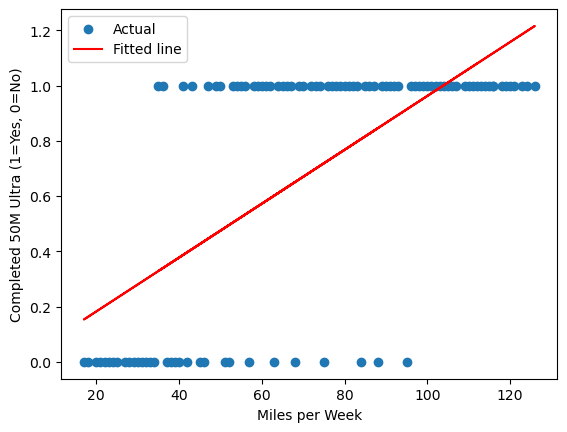

In [13]:
import matplotlib.pyplot as plt

plt.scatter(df['miles_per_week'], df['completed_50m_ultra'], label='Actual')
plt.plot(df['miles_per_week'], df['predicted_completion'], color='red', label='Fitted line')
plt.xlabel('Miles per Week')
plt.ylabel('Completed 50M Ultra (1=Yes, 0=No)')
plt.legend()
plt.show()

In [14]:
df2['predicted_completion'] = model.predict(df2[['miles_per_week']])
df2['predicted_class'] = (df2['predicted_completion'] >= 0.5).astype(int)
df2['predicted_class'] = df2['predicted_class'].map({1: 'Yes', 0: 'No'})

print(df2.head())

   miles_per_week  predicted_completion predicted_class
0              37              0.348379              No
1              39              0.367869              No
2              46              0.436081              No
3              51              0.484803              No
4              88              0.845353             Yes


In [15]:
# See what unique values exist before mapping
print(df['completed_50m_ultra'].unique())

# Also show a quick count of each
print(df['completed_50m_ultra'].value_counts(dropna=False))

[0 1]
completed_50m_ultra
1    69
0    32
Name: count, dtype: int64


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convert predictions to 0/1 classes
df['predicted_class'] = (df['predicted_completion'] >= 0.5).astype(int)

# Compare predicted vs actual
accuracy = accuracy_score(df['completed_50m_ultra'], df['predicted_class'])
cm = confusion_matrix(df['completed_50m_ultra'], df['predicted_class'])
report = classification_report(df['completed_50m_ultra'], df['predicted_class'])

print(f"Accuracy: {accuracy:.3f}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

Accuracy: 0.861
Confusion Matrix:
 [[25  7]
 [ 7 62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        32
           1       0.90      0.90      0.90        69

    accuracy                           0.86       101
   macro avg       0.84      0.84      0.84       101
weighted avg       0.86      0.86      0.86       101



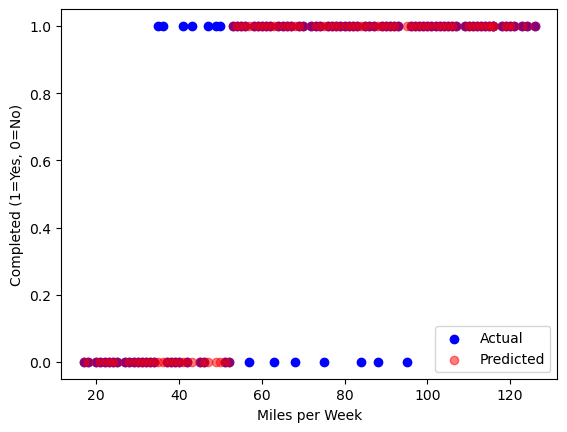

In [18]:
import matplotlib.pyplot as plt

plt.scatter(df['miles_per_week'], df['completed_50m_ultra'], color='blue', label='Actual')
plt.scatter(df['miles_per_week'], df['predicted_class'], color='red', alpha=0.5, label='Predicted')
plt.xlabel('Miles per Week')
plt.ylabel('Completed (1=Yes, 0=No)')
plt.legend()
plt.show()

In [19]:
#Bonus Time

In [20]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Features and target
X = df[['miles_per_week']]
y = df['completed_50m_ultra']

# Train logistic regression
log_model = LogisticRegression()
log_model.fit(X, y)

# Predict probabilities for df
df['pred_prob'] = log_model.predict_proba(X)[:, 1]  # probability of completion
df['pred_class'] = log_model.predict(X)             # 0 or 1 prediction

# Evaluate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y, df['pred_class'])
cm = confusion_matrix(y, df['pred_class'])
report = classification_report(y, df['pred_class'])

print(f"Accuracy: {accuracy:.3f}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

Accuracy: 0.842
Confusion Matrix:
 [[23  9]
 [ 7 62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.87      0.90      0.89        69

    accuracy                           0.84       101
   macro avg       0.82      0.81      0.81       101
weighted avg       0.84      0.84      0.84       101



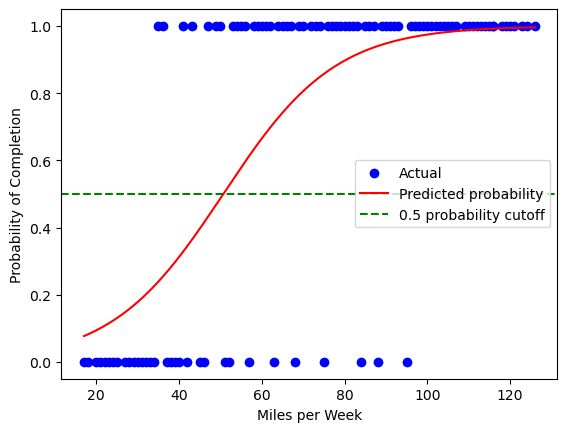

In [25]:
# Sort data for plotting
import warnings
import numpy as np
import matplotlib.pyplot as plt

with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # ignore warnings inside this block

    # Sort data for plotting
    X_plot = np.linspace(df['miles_per_week'].min(), df['miles_per_week'].max(), 300).reshape(-1, 1)
    y_prob = log_model.predict_proba(X_plot)[:, 1]

    plt.scatter(df['miles_per_week'], df['completed_50m_ultra'], color='blue', label='Actual')
    plt.plot(X_plot, y_prob, color='red', label='Predicted probability')
    plt.axhline(0.5, color='green', linestyle='--', label='0.5 probability cutoff')
    plt.xlabel('Miles per Week')
    plt.ylabel('Probability of Completion')
    plt.legend()
    plt.show()

In [26]:
df2['pred_prob'] = log_model.predict_proba(df2[['miles_per_week']])[:, 1]
df2['pred_class'] = (df2['pred_prob'] >= 0.5).astype(int)
df2['pred_class'] = df2['pred_class'].map({1: 'Yes', 0: 'No'})

print(df2.head(50))

    miles_per_week  predicted_completion predicted_class  pred_prob pred_class
0               37              0.348379              No   0.266975         No
1               39              0.367869              No   0.296819         No
2               46              0.436081              No   0.414322         No
3               51              0.484803              No   0.505677        Yes
4               88              0.845353             Yes   0.940030        Yes
5               17              0.153488              No   0.076891         No
6               18              0.163232              No   0.082293         No
7               20              0.182722              No   0.094144         No
8               21              0.192466              No   0.100626         No
9               22              0.202211              No   0.107501         No
10              23              0.211955              No   0.114786         No
11              24              0.221700            